<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [844]:
!pip install pyupbit

In [845]:
import pyupbit

In [846]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-sand", interval="minute15")
df

,open,high,low,close,volume,value
2021-10-30 13:45:00,1280.0,1290.0,1270.0,1290.0,6.776602e+05,8.679205e+08
2021-10-30 14:00:00,1290.0,1300.0,1285.0,1295.0,7.422910e+05,9.607408e+08
2021-10-30 14:15:00,1295.0,1310.0,1290.0,1305.0,6.587871e+05,8.570735e+08
2021-10-30 14:30:00,1305.0,1320.0,1300.0,1305.0,7.906631e+05,1.035846e+09
2021-10-30 14:45:00,1305.0,1315.0,1295.0,1310.0,4.219652e+05,5.495058e+08
...,...,...,...,...,...,...
2021-11-01 14:30:00,1990.0,1995.0,1960.0,1960.0,7.457009e+05,1.472473e+09
2021-11-01 14:45:00,1960.0,1985.0,1945.0,1945.0,2.410709e+06,4.727922e+09
2021-11-01 15:00:00,1945.0,1970.0,1945.0,1945.0,1.130475e+06,2.211654e+09
2021-11-01 15:15:00,1945.0,1950.0,1900.0,1910.0,2.345102e+06,4.500483e+09


In [847]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2021-10-30 13:45:00,1290.0
1,2021-10-30 14:00:00,1295.0
2,2021-10-30 14:15:00,1305.0
3,2021-10-30 14:30:00,1305.0
4,2021-10-30 14:45:00,1310.0
...,...,...
195,2021-11-01 14:30:00,1960.0
196,2021-11-01 14:45:00,1945.0
197,2021-11-01 15:00:00,1945.0
198,2021-11-01 15:15:00,1910.0


In [848]:
#prophet 불러옴
from fbprophet import Prophet

In [849]:
model = Prophet(
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.9,
    changepoint_range=0.7,
)
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [850]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=8, freq='H')
forecast = model.predict(future)

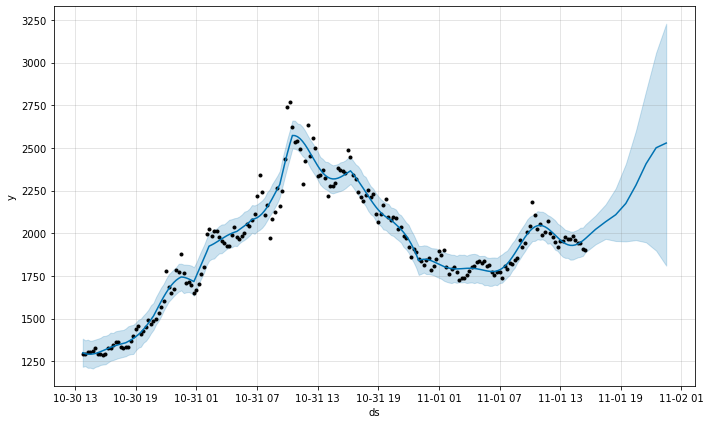

In [851]:
#그래프1
fig1 = model.plot(forecast)

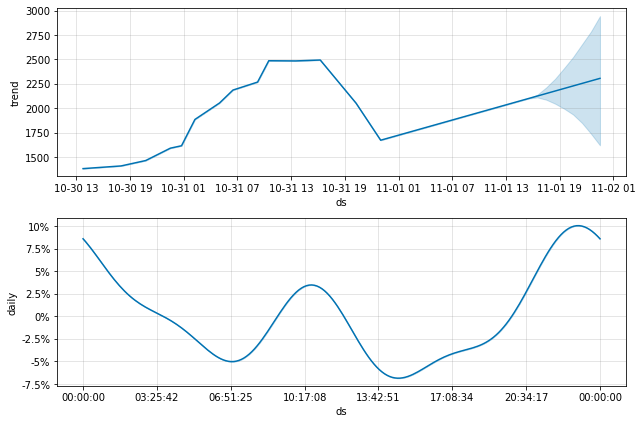

In [852]:
#그래프2
fig2 = model.plot_components(forecast)